In [1]:
import kdezero
import kdezero.functions as F
import kdezero.layers as L
from kdezero.models import Sequential
import numpy as np

In [2]:
train_set = kdezero.datasets.MNIST(train=True)
test_set = kdezero.datasets.MNIST(train=False)

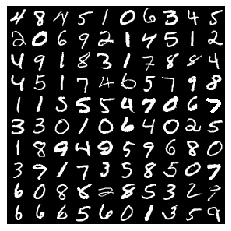

In [3]:
train_set.show()

In [4]:
print(len(train_set))
print(len(test_set))

60000
10000


In [5]:
batch_size = 100
train_loader = kdezero.DataLoader(train_set, batch_size)
test_loader = kdezero.DataLoader(test_set, batch_size, shuffle=False)

In [6]:
hidden_size = 1000

model = Sequential(
    L.Linear(hidden_size),
    F.relu,
    L.Linear(hidden_size),
    F.relu,
    L.Linear(10)
)

In [7]:
optimizer = kdezero.optimizers.Adam()
optimizer.add_hook(kdezero.optimizers.WeightDecay(1e-4))

In [8]:
model.compile(acc=F.accuracy, optimizer=optimizer)

In [9]:
model.fit_generator(train_loader, max_epoch=5, gpu=True)

set gpu
epoch: 1
train loss: 0.19039557500897597, accuracy: 0.9414833333333333
epoch: 2
train loss: 0.07710450223103786, accuracy: 0.9766166666666667
epoch: 3
train loss: 0.05770476561738178, accuracy: 0.982
epoch: 4
train loss: 0.04615596500613416, accuracy: 0.98485
epoch: 5
train loss: 0.03974657757362972, accuracy: 0.9871333333333333


In [10]:
model.evaluate(test_loader)

(0.06160327632962435, 0.9799)

In [11]:
x, t = test_set[0]
x = np.array([x])
t = np.array([t])
t = kdezero.cuda.as_cupy(t)

y = model.predict(x)
print(y)
pred = y.data.argmax(axis=1)
print(pred)
F.accuracy(y, t)

variable([[ -3.4829402  -0.6822179  -1.324656   -1.5579396  -4.439896   -5.4324913
           -12.112271   12.175682   -5.9184036   0.9206952]])
[7]


variable(1.0)

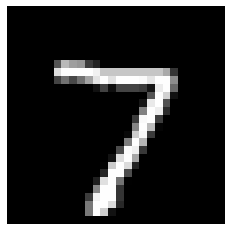

In [12]:
test_set.one_show(0)